
Final Original Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.61      0.64       257
           2       0.63      0.50      0.55       289
           3       0.33      0.64      0.43        89

    accuracy                           0.56       635
   macro avg       0.54      0.58      0.54       635
weighted avg       0.61      0.56      0.57       635



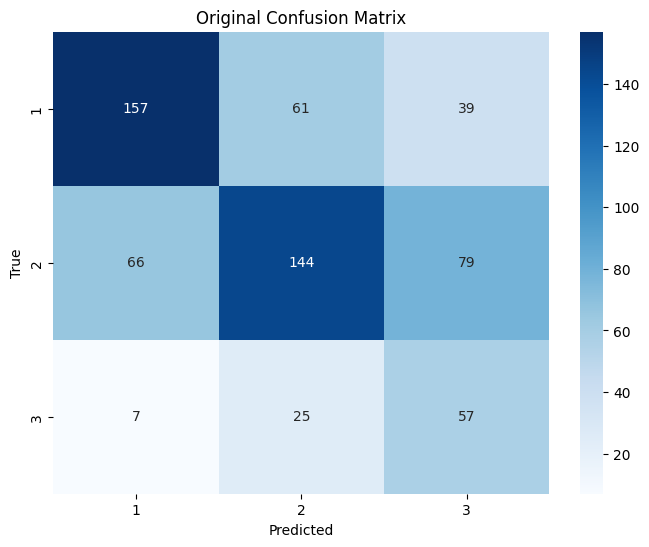

Weighted Precision: 0.6069
Weighted Recall: 0.5638
Weighted F1 Score: 0.5740


In [5]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 設定檔案路徑
true_labels_folder = 'C:/teeth1/result4/'
predicted_labels_folder = 'C:/teeth1/result5/'

# 初始化
all_true_labels = []
all_predicted_labels = []

# 讀取所有excel檔案
for filename in os.listdir(true_labels_folder):
    if filename.endswith('.xlsx'):
        true_labels_file = os.path.join(true_labels_folder, filename)
        predicted_labels_file = os.path.join(predicted_labels_folder, filename.replace('analysis_', '').replace('.xlsx', '_coordinates.xlsx'))
        
        # 讀取Excel檔案
        true_df = pd.read_excel(true_labels_file)
        predicted_df = pd.read_excel(predicted_labels_file)
        
        # 抓取 stage 欄位，去除缺失值，並且轉換為int
        true_labels = true_df['stage'].dropna().astype(int).tolist()
        predicted_labels = predicted_df['stage'].dropna().astype(int).tolist()
        
        # 確保真實標籤和預測標籤的長度一致
        min_length = min(len(true_labels), len(predicted_labels))
        true_labels = true_labels[:min_length]
        predicted_labels = predicted_labels[:min_length]
        
        all_true_labels.extend(true_labels)
        all_predicted_labels.extend(predicted_labels)

# 計算confuse matrix
conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

# 生成數據
print("\nFinal Original Classification Report:")
classification_report_str = classification_report(all_true_labels, all_predicted_labels, digits=2)
print(classification_report_str)

# 可視化圖形(混淆矩陣)
def plot_confusion_matrix(matrix, labels, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# 期數為 1, 2, 3
labels = [1, 2, 3]
plot_confusion_matrix(conf_matrix, labels, title="Original Confusion Matrix")

# 計算 precision、recall 和 F1
precision = precision_score(all_true_labels, all_predicted_labels, average='weighted')
recall = recall_score(all_true_labels, all_predicted_labels, average='weighted')
f1 = f1_score(all_true_labels, all_predicted_labels, average='weighted')

# 輸出 precision、recall 和 F1
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")



Final Corrected Classification Report (allowing 1-stage difference):
              precision    recall  f1-score   support

           1       0.97      0.85      0.90       257
           2       1.00      1.00      1.00       289
           3       0.68      0.92      0.78        89

    accuracy                           0.93       635
   macro avg       0.88      0.92      0.90       635
weighted avg       0.94      0.93      0.93       635



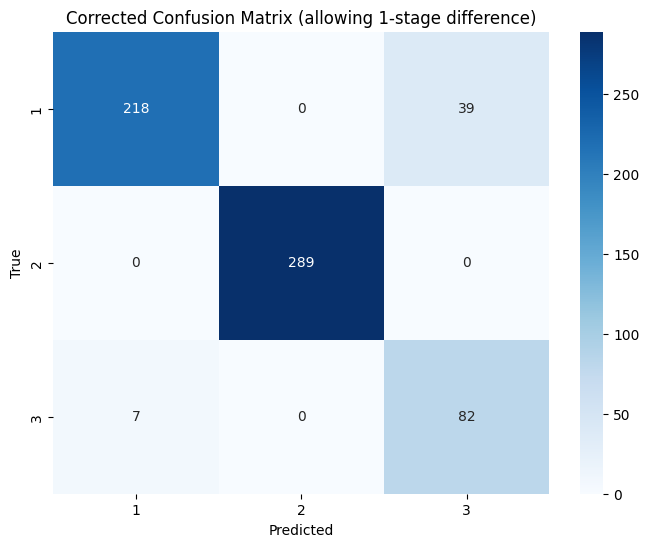

Weighted Precision: 0.9422
Weighted Recall: 0.9276
Weighted F1 Score: 0.9307


In [6]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 設定檔案路徑
true_labels_folder = 'C:/teeth1/result4/'
predicted_labels_folder = 'C:/teeth1/result5/'

# 初始化
all_true_labels = []
all_predicted_labels = []
adjusted_predicted_labels = []

# true_labels_folder 文件夹中的所有 Excel 文件
for filename in os.listdir(true_labels_folder):
    if filename.endswith('.xlsx'):
        true_labels_file = os.path.join(true_labels_folder, filename)
        predicted_labels_file = os.path.join(predicted_labels_folder, filename.replace('analysis_', '').replace('.xlsx', '_coordinates.xlsx'))  # 假设文件名一致
        
        # 讀取Excel文件
        true_df = pd.read_excel(true_labels_file)
        predicted_df = pd.read_excel(predicted_labels_file)
        
        # 提取 stage 欄位，去除缺失值，轉換為整数類型
        true_labels = true_df['stage'].dropna().astype(int).tolist()
        predicted_labels = predicted_df['stage'].dropna().astype(int).tolist()
        
        # 確保真實標籤和預測標籤的長度一致
        min_length = min(len(true_labels), len(predicted_labels))
        true_labels = true_labels[:min_length]
        predicted_labels = predicted_labels[:min_length]
        
        all_true_labels.extend(true_labels)
        all_predicted_labels.extend(predicted_labels)

        # 根據誤差範圍進行調整
        for true_label, pred_label in zip(true_labels, predicted_labels):
            if abs(true_label - pred_label) <= 1:  # 如果誤差在1期之內，則認定預測正確
                adjusted_predicted_labels.append(true_label)
            else:
                adjusted_predicted_labels.append(pred_label)

# 計算 confusion matrix
conf_matrix = confusion_matrix(all_true_labels, adjusted_predicted_labels)

# 計算分類報告
print("\nFinal Corrected Classification Report (allowing 1-stage difference):")
corrected_classification_report = classification_report(all_true_labels, adjusted_predicted_labels, digits=2)
print(corrected_classification_report)

# 繪製混淆矩陣
def plot_confusion_matrix(matrix, labels, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# 標籤 (假設期數為1, 2, 3)
labels = [1, 2, 3]
plot_confusion_matrix(conf_matrix, labels, title="Corrected Confusion Matrix (allowing 1-stage difference)")

# 計算 精確率、召回率、F1-score
precision = precision_score(all_true_labels, adjusted_predicted_labels, average='weighted')
recall = recall_score(all_true_labels, adjusted_predicted_labels, average='weighted')
f1 = f1_score(all_true_labels, adjusted_predicted_labels, average='weighted')

# 顯示精確率、召回率、F1-score
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")


In [4]:
import os
import pandas as pd

# 設定檔案路徑
true_labels_folder = 'C:/teeth1/result4/'
predicted_labels_folder = 'C:/teeth1/result5/'

# 初始化统计结果
total_true_tooth_tip_count = 0
total_predicted_stage_null_count = 0

# 遍历 true_labels_folder 文件夹中的所有 Excel 文件
for filename in os.listdir(true_labels_folder):
    if filename.endswith('.xlsx'):
        true_labels_file = os.path.join(true_labels_folder, filename)
        predicted_labels_file = os.path.join(predicted_labels_folder, filename.replace('analysis_', '').replace('.xlsx', '_coordinates.xlsx'))  # 假设文件名一致
        
        # 读取Excel文件
        true_df = pd.read_excel(true_labels_file)
        predicted_df = pd.read_excel(predicted_labels_file)
        
        # 打印列名，供检查
        print(f"Columns in {filename}:")
        print(true_df.columns)
        print(predicted_df.columns)
        print()

        # 检查是否存在 `Tooth_Tip_ID` 列
        if 'Tooth_Tip_ID' in true_df.columns:
            true_tooth_tip_count = true_df['Tooth_Tip_ID'].nunique()
            total_true_tooth_tip_count += true_tooth_tip_count
        else:
            print(f"File {filename} does not contain 'Tooth_Tip_ID' column.")
        
        # 统计 stage 为空的数量
        if 'stage' in predicted_df.columns:
            predicted_stage_null_count = predicted_df['stage'].isnull().sum()
            total_predicted_stage_null_count += predicted_stage_null_count
        else:
            print(f"File {filename} does not contain 'stage' column.")

# 输出结果
print(f"Total Tooth_Tip_ID Count across all folders: {total_true_tooth_tip_count}")
print(f"Total Stage Null Count across all folders: {total_predicted_stage_null_count}")


Columns in analysis_1.xlsx:
Index(['Tooth_ID', 'Tooth_Tip_ID', '珐瑯質跟象牙質交接點x', '珐瑯質跟象牙質交接點y', '牙齦交接點x',
       '牙齦交接點y', '牙本體尖端點x', '牙本體尖端點y', '長度', 'stage'],
      dtype='object')
Index(['Tooth_ID', 'Tooth_Tip_ID', 'Enamel_X', 'Enamel_Y', 'Gum_X', 'Gum_Y',
       'Dentin_X', 'Dentin_Y', 'Percentage', 'stage'],
      dtype='object')

Columns in analysis_10.xlsx:
Index(['Tooth_ID', 'Tooth_Tip_ID', '珐瑯質跟象牙質交接點x', '珐瑯質跟象牙質交接點y', '牙齦交接點x',
       '牙齦交接點y', '牙本體尖端點x', '牙本體尖端點y', '長度', 'stage'],
      dtype='object')
Index(['Tooth_ID', 'Tooth_Tip_ID', 'Enamel_X', 'Enamel_Y', 'Gum_X', 'Gum_Y',
       'Dentin_X', 'Dentin_Y', 'Percentage', 'stage'],
      dtype='object')

Columns in analysis_100.xlsx:
Index(['Tooth_ID', 'Tooth_Tip_ID', '珐瑯質跟象牙質交接點x', '珐瑯質跟象牙質交接點y', '牙齦交接點x',
       '牙齦交接點y', '牙本體尖端點x', '牙本體尖端點y', '長度', 'stage'],
      dtype='object')
Index(['Tooth_ID', 'Tooth_Tip_ID', 'Enamel_X', 'Enamel_Y', 'Gum_X', 'Gum_Y',
       'Dentin_X', 'Dentin_Y', 'Percentage', 'stage'],
      dtype='ob

In [1]:
import os
import shutil

# 设置根目录和新的主目录
root_folder = r'C:\teeth1\150'
new_root_folder = r'C:\teeth1\extracted_files'

# 确保新的主目录存在
os.makedirs(new_root_folder, exist_ok=True)

# 遍历根目录下的所有子文件夹
for subdir in os.listdir(root_folder):
    subdir_path = os.path.join(root_folder, subdir)
    if os.path.isdir(subdir_path):
        # 动态生成要抓取的文件名
        output_filename = f"output_{subdir}.png"
        output_line_filename = f"output_line_{subdir}.png"
        files_to_copy = [output_filename, output_line_filename]
        
        # 为每个子文件夹创建一个新的子文件夹
        new_subdir_path = os.path.join(new_root_folder, subdir)
        os.makedirs(new_subdir_path, exist_ok=True)
        
        for file_name in files_to_copy:
            file_path = os.path.join(subdir_path, file_name)
            if os.path.isfile(file_path):
                # 复制文件到新的子文件夹
                shutil.copy2(file_path, new_subdir_path)
                print(f'檔案 {file_name} 已經從 {subdir_path} 複製到 {new_subdir_path}')

print('ok')


檔案 output_1.png 已經從 C:\teeth1\150\1 複製到 C:\teeth1\extracted_files\1
檔案 output_line_1.png 已經從 C:\teeth1\150\1 複製到 C:\teeth1\extracted_files\1
檔案 output_10.png 已經從 C:\teeth1\150\10 複製到 C:\teeth1\extracted_files\10
檔案 output_line_10.png 已經從 C:\teeth1\150\10 複製到 C:\teeth1\extracted_files\10
檔案 output_100.png 已經從 C:\teeth1\150\100 複製到 C:\teeth1\extracted_files\100
檔案 output_line_100.png 已經從 C:\teeth1\150\100 複製到 C:\teeth1\extracted_files\100
檔案 output_101.png 已經從 C:\teeth1\150\101 複製到 C:\teeth1\extracted_files\101
檔案 output_line_101.png 已經從 C:\teeth1\150\101 複製到 C:\teeth1\extracted_files\101
檔案 output_102.png 已經從 C:\teeth1\150\102 複製到 C:\teeth1\extracted_files\102
檔案 output_line_102.png 已經從 C:\teeth1\150\102 複製到 C:\teeth1\extracted_files\102
檔案 output_103.png 已經從 C:\teeth1\150\103 複製到 C:\teeth1\extracted_files\103
檔案 output_line_103.png 已經從 C:\teeth1\150\103 複製到 C:\teeth1\extracted_files\103
檔案 output_104.png 已經從 C:\teeth1\150\104 複製到 C:\teeth1\extracted_files\104
檔案 output_line_104.png 已經從